In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("insurance.csv")


### 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.shape

(1338, 7)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 5.Check Null Values In The Dataset

In [8]:
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.dropna(inplace = True)

### 6. Get Overall Statistics About The Dataset

In [10]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### 7. Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values 

In [11]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [13]:
X = data.drop(['charges'],axis=1)
y = data['charges']

### 9. Train/Test split
#### 1. Split data into two part : a training set and a testing set
#### 2. Train the model(s) on training set
#### 3. Test the Model(s) on Testing set

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [15]:
print(X_train)
print(y_train)

      age  sex     bmi  children  smoker  region
1048   25    0  22.515         1       0       3
45     55    1  37.300         0       0       1
201    48    0  32.230         1       0       2
153    42    0  23.370         0       1       4
1251   19    1  19.800         0       0       1
...   ...  ...     ...       ...     ...     ...
229    47    1  25.460         2       0       4
70     27    0  24.750         0       1       2
132    53    0  35.900         2       0       1
1313   19    0  34.700         2       1       1
109    63    1  35.090         0       1       2

[1070 rows x 6 columns]
1048     3594.17085
45      20630.28351
201      8871.15170
153     19964.74630
1251     1241.56500
           ...     
229      9225.25640
70      16577.77950
132     11163.56800
1313    36397.57600
109     47055.53210
Name: charges, Length: 1070, dtype: float64


### 10. Import the models

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 11. Model Training

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

### 12. Prediction on Test Data

In [18]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [19]:
df1

,Actual,Lr,svm,rf,gr
589,5976.83110,7922.868757,9182.474067,6163.626218,6672.807580
383,5846.91760,11684.988960,9172.145790,7074.161486,6332.251295
534,13831.11520,17116.735235,9331.695345,14157.914953,13219.898695
284,9625.92000,10931.108082,9277.201083,11931.600410,11419.734706
821,2680.94930,407.696566,9118.124662,8791.619384,7037.747383
...,...,...,...,...,...
871,3392.36520,4498.517129,9113.405728,3642.751905,5034.535155
496,4931.64700,4053.485793,9138.105311,9612.615728,6328.141107
578,9724.53000,10954.447315,9276.831736,11107.736358,12349.576691
1012,36580.28216,15914.042451,9323.634136,16795.013858,17329.396588


### 13. Compare Performance Visually 

In [20]:
import matplotlib.pyplot as plt

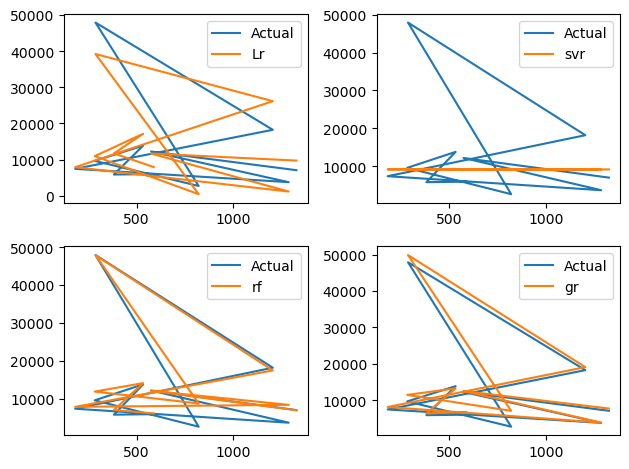

In [21]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()
plt.legend()

### 14. Evaluating the Algorithm

In [22]:
from sklearn import metrics

In [23]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [24]:
print(score1,score2,score3,score4)

0.7866124253214011 -0.1390430797189086 0.8615142674995921 0.8764854793725114


In [25]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [26]:
print(s1,s2,s3,s4)

3949.1597402875386 8811.919960484822 2642.9145420733707 2483.7489995991555


### 15. Predict Charges For New Customer

In [27]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [28]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [29]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  43639.29053443173


### From above we found that gredianBoostingRegressor is the best model for this dataset. Before production, it is good practice to train our model on the entire dataset.

In [30]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

## New Model

In [31]:
import joblib
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [32]:
model = joblib.load('model_joblib_gr')

In [33]:
model.predict(df)

array([42148.361888])

### Predict Charges For New Customer

In [34]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42148.36188800322


## GUI

In [35]:
from tkinter import *

In [36]:
import joblib

In [37]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    res = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = "Cost of Insurance: ").grid(row=7)
    Label(master, text= res).grid(row=8)

master = Tk()
master.title('Insurance Price Predection')
Label(master, text = "Enter your Age: ").grid(row=1)
Label(master, text = "Enter your Gender(Male - 1/Female - 0): ").grid(row=2)
Label(master, text = "Enter your BMI Value: ").grid(row=3)
Label(master, text = "Enter the Number of Children: ").grid(row=4)
Label(master, text = "Smoker - 1 / Non Smoker - 0 (1/0): ").grid(row=5)
Label(master, text = "Enter your region [1-4]:  ").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master, text="Predict", command=show_entry).grid()

mainloop()


This will open a new application in your computer.
Please fill in all the details to Predict your Insurance Premiun charges.